<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,67.973766,-0.000305,77.973461,77.973846,-0.000386
1,0.0,1.0,22.272823,0.006578,32.279401,32.273572,0.005829
2,0.0,2.0,40.620008,0.000337,50.620345,50.620489,-0.000144
3,0.0,3.0,81.168126,0.000165,91.168291,91.168014,0.000277
4,0.0,4.0,83.003008,-0.000241,93.002767,93.002869,-0.000102
...,...,...,...,...,...,...,...
29995,999.0,25.0,32.137146,0.000312,42.137458,42.135715,0.001743
29996,999.0,26.0,57.962021,-0.000556,67.961465,67.961366,0.000099
29997,999.0,27.0,83.780265,0.000225,93.780489,93.780386,0.000103
29998,999.0,28.0,99.676361,-0.000210,109.676151,109.676960,-0.000809


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,67.973766,-0.000305,77.973461,77.973846,-0.000386
1,0.0,1.0,22.272823,0.006578,32.279401,32.273572,0.005829
2,0.0,2.0,40.620008,0.000337,50.620345,50.620489,-0.000144
3,0.0,3.0,81.168126,0.000165,91.168291,91.168014,0.000277
4,0.0,4.0,83.003008,-0.000241,93.002767,93.002869,-0.000102
...,...,...,...,...,...,...,...
29995,999.0,25.0,32.137146,0.000312,42.137458,42.135715,0.001743
29996,999.0,26.0,57.962021,-0.000556,67.961465,67.961366,0.000099
29997,999.0,27.0,83.780265,0.000225,93.780489,93.780386,0.000103
29998,999.0,28.0,99.676361,-0.000210,109.676151,109.676960,-0.000809


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    67.973766 -0.000305   77.973461   77.973846 -0.000386
      1.0    22.272823  0.006578   32.279401   32.273572  0.005829
      2.0    40.620008  0.000337   50.620345   50.620489 -0.000144
      3.0    81.168126  0.000165   91.168291   91.168014  0.000277
      4.0    83.003008 -0.000241   93.002767   93.002869 -0.000102
...                ...       ...         ...         ...       ...
999.0 25.0   32.137146  0.000312   42.137458   42.135715  0.001743
      26.0   57.962021 -0.000556   67.961465   67.961366  0.000099
      27.0   83.780265  0.000225   93.780489   93.780386  0.000103
      28.0   99.676361 -0.000210  109.676151  109.676960 -0.000809
      29.0   74.433736 -0.000071   84.433666   84.433577  0.000089

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    67.973766 -0.000305   77.973461   77.973846 -0.000386
      1.0    22.272823  0.006578   32.279401   32.273572  0.005829
      2.0    40.620008  0.000337   50.620345   50.620489 -0.000144
      3.0    81.168126  0.000165   91.168291   91.168014  0.000277
      4.0    83.003008 -0.000241   93.002767   93.002869 -0.000102
...                ...       ...         ...         ...       ...
999.0 25.0   32.137146  0.000312   42.137458   42.135715  0.001743
      26.0   57.962021 -0.000556   67.961465   67.961366  0.000099
      27.0   83.780265  0.000225   93.780489   93.780386  0.000103
      28.0   99.676361 -0.000210  109.676151  109.676960 -0.000809
      29.0   74.433736 -0.000071   84.433666   84.433577  0.000089

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,67.973766,-0.000305,77.973461,77.973846,-0.000386
1,0.0,1.0,22.272823,0.006578,32.279401,32.273572,0.005829
2,0.0,2.0,40.620008,0.000337,50.620345,50.620489,-0.000144
3,0.0,3.0,81.168126,0.000165,91.168291,91.168014,0.000277
4,0.0,4.0,83.003008,-0.000241,93.002767,93.002869,-0.000102
...,...,...,...,...,...,...,...
29995,999.0,25.0,32.137146,0.000312,42.137458,42.135715,0.001743
29996,999.0,26.0,57.962021,-0.000556,67.961465,67.961366,0.000099
29997,999.0,27.0,83.780265,0.000225,93.780489,93.780386,0.000103
29998,999.0,28.0,99.676361,-0.000210,109.676151,109.676960,-0.000809


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    67.973766 -0.000305   77.973461   77.973846 -0.000386
      1.0    22.272823  0.006578   32.279401   32.273572  0.005829
      2.0    40.620008  0.000337   50.620345   50.620489 -0.000144
      3.0    81.168126  0.000165   91.168291   91.168014  0.000277
      4.0    83.003008 -0.000241   93.002767   93.002869 -0.000102
...                ...       ...         ...         ...       ...
999.0 25.0   32.137146  0.000312   42.137458   42.135715  0.001743
      26.0   57.962021 -0.000556   67.961465   67.961366  0.000099
      27.0   83.780265  0.000225   93.780489   93.780386  0.000103
      28.0   99.676361 -0.000210  109.676151  109.676960 -0.000809
      29.0   74.433736 -0.000071   84.433666   84.433577  0.000089

[30000 rows x 5 columns]

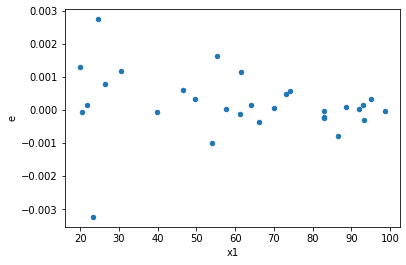

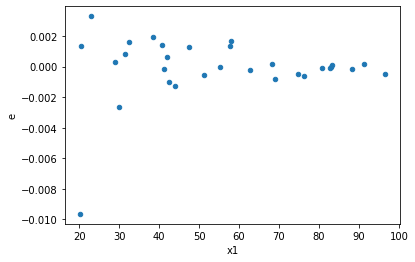

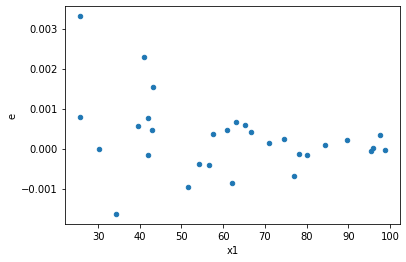

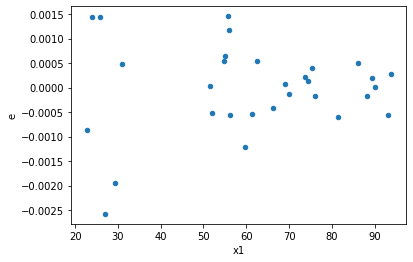

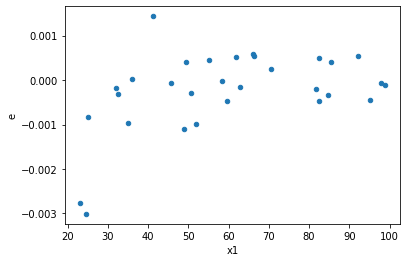

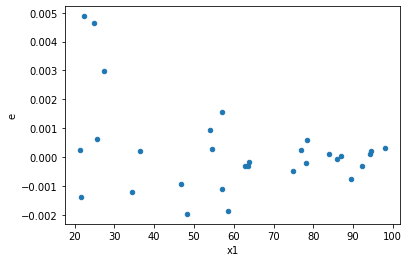

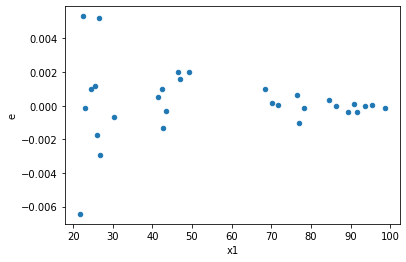

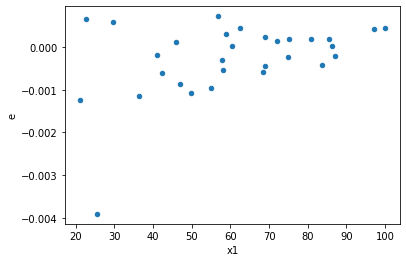

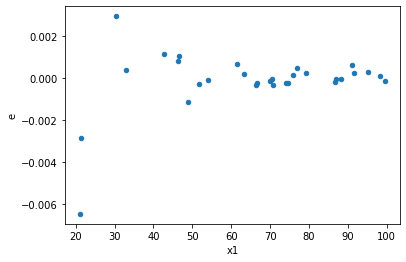

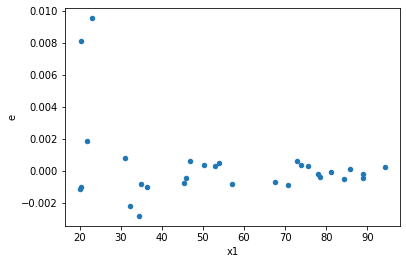

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
564.0,11.0,11.0,1.4135179847099584e-06,2.629372203743397e-06,1.2850163497363257e-07,2.390338367039452e-07,1.8601618318163258,0.31806649017229716,0.8409667549138514,0.15903324508614858,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,3.744747198624508e-05,1.1130537351461473e-06,3.4043156351131893e-06,1.011867031951043e-07,0.02972306743576671,1.4672220262225623e-06,Reject005=0 : Heteroscedasticity
1.0,11.0,11.0,8.028491619419609e-05,7.485717946659866e-07,7.2986287449269174e-06,6.805198133327151e-08,0.009323940662219959,3.0061790599648266e-09,Reject005=0 : Heteroscedasticity
2.0,11.0,11.0,2.9828722741585177e-05,1.2464974131833054e-06,2.7117020674168344e-06,1.1331794665302777e-07,0.04178849439790204,8.577491021954688e-06,Reject005=0 : Heteroscedasticity
3.0,11.0,11.0,4.504537122390211e-05,1.690957795882121e-06,4.0950337476274645e-06,1.5372343598928374e-07,0.03753899124234234,4.939285671078624e-06,Reject005=0 : Heteroscedasticity
4.0,11.0,11.0,2.3799564346972603e-05,1.0096086764281772e-06,2.1635967588156913e-06,9.178260694801612e-08,0.042421309134450746,9.264363513443891e-06,Reject005=0 : Heteroscedasticity
5.0,11.0,11.0,2.7970911249883712e-05,6.899671884870884e-07,2.542810113625792e-06,6.272428986246258e-08,0.024667311776978913,5.508033213512013e-07,Reject005=0 : Heteroscedasticity
6.0,11.0,11.0,3.3921418043345464e-06,1.145330869907552e-06,3.0837652766677694e-07,1.0412098817341383e-07,0.33764239114179295,0.08533931843993671,Reject005=1 : Homoscedasticity
7.0,11.0,11.0,2.749788761964775e-05,1.4721381910065893e-06,2.4998079654225227e-06,1.3383074463696266e-07,0.05353641019154938,3.019891547889826e-05,Reject005=0 : Heteroscedasticity
8.0,11.0,11.0,3.641038526197294e-05,1.749732307485262e-06,3.3100350238157217e-06,1.590665734077511e-07,0.04805585809916395,1.7498825032177217e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    989
Reject005=1 : Homoscedasticity       11
Name: Result_test, dtype: int64